<center> <span style="color:indigo">Proyecto integrador conjunto de las materias: Machine Learning e Inferencia Bayesiana y Matemáicas aplicadas a la Ciencia de Datos</span> </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Centro_Universitario_del_Guadalajara_Logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Elaborado por:  </span>  </center>
<center> <span style="color:Blue"> Jael Sadai Cabrera Gómez, Hanna Paola Ramírez Casillas y Lucía Montserrat Chacón Ocegueda </span>  </center>
<center> <span style="color:DarkBlue">  Licenciatura en Inteligencia Artificial y Ciencia de Datos  </span>  </center>
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("PCOS_data_2.csv")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


# Limpieza de nombres de columnas

In [5]:
# Copiamos el dataframe original para no modificarlo directamente
df_clean = df.copy()

# Limpieza de nombres de columnas
df_clean.columns = (
    df_clean.columns
      .str.strip()                                # quitar espacios al inicio/fin
      .str.replace(r'\s+', '_', regex=True)       # espacios internos -> _
      .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # quitar caracteres raros
      .str.lower()                                # todo en minúsculas
)

df_clean.columns

Index(['sl_no', 'patient_file_no', 'pcos_yn', 'age_yrs', 'weight_kg',
       'heightcm', 'bmi', 'blood_group', 'pulse_ratebpm', 'rr_breathsmin',
       'hbgdl', 'cycleri', 'cycle_lengthdays', 'marraige_status_yrs',
       'pregnantyn', 'no_of_aborptions', 'i_betahcgmiuml', 'ii_betahcgmiuml',
       'fshmiuml', 'lhmiuml', 'fshlh', 'hipinch', 'waistinch',
       'waisthip_ratio', 'tsh_miul', 'amhngml', 'prlngml', 'vit_d3_ngml',
       'prgngml', 'rbsmgdl', 'weight_gainyn', 'hair_growthyn',
       'skin_darkening_yn', 'hair_lossyn', 'pimplesyn', 'fast_food_yn',
       'regexerciseyn', 'bp__systolic_mmhg', 'bp__diastolic_mmhg',
       'follicle_no_l', 'follicle_no_r', 'avg_f_size_l_mm', 'avg_f_size_r_mm',
       'endometrium_mm', 'unnamed_44'],
      dtype='object')

- Quitar espacios al inicio/fin.
- Reemplazar espacios internos por guiones bajos _.
- Eliminar caracteres raros (paréntesis, puntos, etc.).
- Pasar todo a minúsculas.

# Identificar y tratar valores nulos

In [6]:
df_clean.isna().sum().sort_values(ascending=False)

unnamed_44             997
marraige_status_yrs    459
fast_food_yn           459
patient_file_no        458
sl_no                  458
heightcm               458
bmi                    458
blood_group            458
pulse_ratebpm          458
rr_breathsmin          458
pcos_yn                458
age_yrs                458
weight_kg              458
cycle_lengthdays       458
cycleri                458
hbgdl                  458
pregnantyn             458
ii_betahcgmiuml        458
fshmiuml               458
no_of_aborptions       458
i_betahcgmiuml         458
hipinch                458
waistinch              458
waisthip_ratio         458
tsh_miul               458
amhngml                458
prlngml                458
lhmiuml                458
fshlh                  458
prgngml                458
vit_d3_ngml            458
hair_growthyn          458
rbsmgdl                458
skin_darkening_yn      458
hair_lossyn            458
pimplesyn              458
weight_gainyn          458
r

En este dataset en particular, hay muchas filas tienen NaN en variables clave como age_yrs, bmi, pcos_yn, etc. Eso significa que hay dos grupos de registros: unos con información clínica completa y otros incompletos.

In [7]:
df_clean = df_clean.dropna(subset=['age_yrs'])
df_clean.shape

(541, 45)

Aquí decidimos quedarnos solo con los registros que sí tienen información clínica completa.

In [8]:
cols_to_drop = ['sl_no', 'patient_file_no', 'unnamed_44']

# Eliminamos solo las columnas que existan
cols_to_drop = [c for c in cols_to_drop if c in df_clean.columns]
df_clean = df_clean.drop(columns=cols_to_drop)

df_clean.shape

(541, 42)

Aquí eliminamos las columnas irrelevantes para nuestro análisis. Estas columnas no describen características médicas, solo sirven como identificadores y quitarlas simplifica el análisis sin perder información relevante.

In [9]:
df_clean.isna().sum().sort_values(ascending=False)

fast_food_yn           1
marraige_status_yrs    1
weight_kg              0
heightcm               0
bmi                    0
blood_group            0
pulse_ratebpm          0
rr_breathsmin          0
pcos_yn                0
age_yrs                0
cycleri                0
hbgdl                  0
pregnantyn             0
cycle_lengthdays       0
i_betahcgmiuml         0
ii_betahcgmiuml        0
fshmiuml               0
no_of_aborptions       0
fshlh                  0
hipinch                0
waistinch              0
waisthip_ratio         0
tsh_miul               0
amhngml                0
prlngml                0
lhmiuml                0
vit_d3_ngml            0
prgngml                0
weight_gainyn          0
rbsmgdl                0
hair_growthyn          0
skin_darkening_yn      0
hair_lossyn            0
pimplesyn              0
regexerciseyn          0
bp__systolic_mmhg      0
bp__diastolic_mmhg     0
follicle_no_l          0
follicle_no_r          0
avg_f_size_l_mm        0


# Imputar los nulos restantes y corregir tipos

In [10]:
df_clean.dtypes.value_counts(), df_clean.select_dtypes('object').columns

(float64    40
 object      2
 Name: count, dtype: int64,
 Index(['ii_betahcgmiuml', 'amhngml'], dtype='object'))

In [12]:
def to_float_clean(series):
    return (
        series.astype(str)
              .str.replace(',', '.', regex=False)
              .str.replace(r'[^0-9.\-]', '', regex=True)
              .str.replace(r'\.(?=.*\.)', '', regex=True)  # elimina puntos extra
              .str.rstrip('.')                            # quita punto final
              .replace('', np.nan)
              .astype(float)
    )

Limpia una serie de strings numéricos y la convierte a float.
- Reemplaza comas por puntos.
- Quita caracteres no numéricos.
- Deja solo un punto decimal.
- Quita punto final suelto.

In [13]:
# Convertir columnas específicas de texto a float (ajusta la lista si es necesario)
cols_texto_a_float = ['ii_betahcgmiuml', 'amhngml']

for col in cols_texto_a_float:
    if col in df_clean.columns:
        df_clean[col] = to_float_clean(df_clean[col])

In [18]:
# Imputación para variables categóricas (moda)
categoricas_modas = [
    'fast_food_yn', 'weight_gainyn', 'hair_growthyn',
    'skin_darkening_yn', 'hair_lossyn', 'pimplesyn',
    'regexerciseyn', 'pregnantyn'
]

for col in categoricas_modas:
    if col in df_clean.columns:
        modo = df_clean[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(modo)

In [19]:
# Imputación para variable numérica por mediana
if 'marraige_status_yrs' in df_clean.columns:
    mediana_marraige = df_clean['marraige_status_yrs'].median()
    df_clean['marraige_status_yrs'] = df_clean['marraige_status_yrs'].fillna(mediana_marraige)

In [20]:
# Imputación para las columnas numéricas convertidas desde texto
for col in cols_texto_a_float:
    if col in df_clean.columns:
        mediana_col = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(mediana_col)

In [21]:
# Verificar que ya no existan datos nulos
df_clean.isna().sum().sum()

np.int64(0)

- Moda para categóricas: sustituimos los pocos faltantes por el valor más frecuente, sin distorsionar mucho la distribución.
- Mediana para numéricas: es robusta ante valores extremos.
- Convertir texto a float es necesario para poder calcular estadísticas y hacer gráficas.

# Estadística descriptiva básica (tendencia central y dispersión)

In [22]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['pcos_yn', 'age_yrs', 'weight_kg', 'heightcm', 'bmi', 'blood_group',
       'pulse_ratebpm', 'rr_breathsmin', 'hbgdl', 'cycleri',
       'cycle_lengthdays', 'marraige_status_yrs', 'pregnantyn',
       'no_of_aborptions', 'i_betahcgmiuml', 'ii_betahcgmiuml', 'fshmiuml',
       'lhmiuml', 'fshlh', 'hipinch', 'waistinch', 'waisthip_ratio',
       'tsh_miul', 'amhngml', 'prlngml', 'vit_d3_ngml', 'prgngml', 'rbsmgdl',
       'weight_gainyn', 'hair_growthyn', 'skin_darkening_yn', 'hair_lossyn',
       'pimplesyn', 'fast_food_yn', 'regexerciseyn', 'bp__systolic_mmhg',
       'bp__diastolic_mmhg', 'follicle_no_l', 'follicle_no_r',
       'avg_f_size_l_mm', 'avg_f_size_r_mm', 'endometrium_mm'],
      dtype='object')

In [23]:
desc = df_clean[numeric_cols].describe().T  # transpuesta para ver mejor
desc

,count,mean,std,min,25%,50%,75%,max
pcos_yn,541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
age_yrs,541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
weight_kg,541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
heightcm,541.0,156.484288,6.033290,137.000000,152.000000,156.000000,160.000000,180.000000
bmi,541.0,24.319353,4.050819,12.417882,21.707923,24.238227,26.638918,38.900714
blood_group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
pulse_ratebpm,541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
rr_breathsmin,541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
hbgdl,541.0,11.160074,0.866835,8.500000,10.500000,11.000000,11.700000,14.800000
cycleri,541.0,2.560074,0.901950,2.000000,2.000000,2.000000,4.000000,5.000000


In [24]:
vars_interes = ['age_yrs', 'bmi', 'waisthip_ratio', 'amhngml']  # Ajusta según tus columnas
df_clean[vars_interes].describe().T

,count,mean,std,min,25%,50%,75%,max
age_yrs,541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
bmi,541.0,24.319353,4.050819,12.417882,21.707923,24.238227,26.638918,38.900714
waisthip_ratio,541.0,0.891900,0.046317,0.755556,0.857143,0.894737,0.928571,0.979167
amhngml,541.0,5.620634,5.876742,0.100000,2.010000,3.700000,6.900000,66.000000


# Medidas de asimetría, curtosis y momentos estadísticos

In [27]:
skewness = df_clean[numeric_cols].skew()
kurtosis = df_clean[numeric_cols].kurt()  # curtosis excesiva

print("Asimetría:")
print(skewness)
print("\nCurtosis:")
print(kurtosis)

Asimetría:
pcos_yn                 0.738773
age_yrs                 0.354004
weight_kg               0.515227
heightcm                0.325322
bmi                     0.265719
blood_group            -0.132627
pulse_ratebpm          -7.948497
rr_breathsmin           1.234130
hbgdl                   0.744278
cycleri                 0.997662
cycle_lengthdays        0.826791
marraige_status_yrs     1.143952
pregnantyn              0.492425
no_of_aborptions        2.970831
i_betahcgmiuml          7.523338
ii_betahcgmiuml        12.809005
fshmiuml               23.244525
lhmiuml                23.234631
fshlh                  21.463642
hipinch                -0.200873
waistinch               0.194675
waisthip_ratio         -0.349283
tsh_miul                9.790706
amhngml                 3.297014
prlngml                 2.441412
vit_d3_ngml            16.436558
prgngml                20.730654
rbsmgdl                 5.488676
weight_gainyn           0.508661
hair_growthyn           1.018699

- Valores de asimetría cercanos a 0 indican distribuciones más o menos simétricas.
- Asimetría positiva: cola hacia la derecha (valores altos extremos).
- Asimetría negativa: cola hacia la izquierda.
- Curtosis positiva elevada: distribución más "picuda" con colas pesadas (más valores extremos).
- Curtosis negativa: distribución más plana.

In [29]:
def central_moments(series, max_order=4):
    x = series.dropna().values
    mu = x.mean()
    moments = {}
    for k in range(1, max_order + 1):
        moments[k] = np.mean((x - mu)**k)
    return moments

for col in vars_interes:
    print(f"\nMomentos centrales para {col}:")
    print(central_moments(df_clean[col]))


Momentos centrales para age_yrs:
{1: np.float64(-7.880326089760816e-16), 2: np.float64(29.224862563678546), 3: np.float64(55.77375640551056), 4: np.float64(2426.5786858740057)}

Momentos centrales para bmi:
{1: np.float64(5.778905799157931e-16), 2: np.float64(16.37880578611329), 3: np.float64(17.564608269500763), 4: np.float64(1037.778568402977)}

Momentos centrales para waisthip_ratio:
{1: np.float64(6.566938408134013e-17), 2: np.float64(0.0021412772446500646), 3: np.float64(-3.4512756526916515e-05), 4: np.float64(1.0817671323897317e-05)}

Momentos centrales para amhngml:
{1: np.float64(2.101420290602884e-16), 2: np.float64(34.47226146309463), 3: np.float64(665.4550170959586), 4: np.float64(29445.774604920323)}


Calcula los momentos centrales hasta un orden dado.
- Momento 1: ~0 (por construcción)
- Momento 2: varianza
- Momento 3: relacionado con asimetría
- Momento 4: relacionado con curtosis

Los momentos estadísticos nos dan información más profunda sobre la forma de la distribución.
- 1er momento central ≈ 0.
- 2º momento central = varianza.
- 3º y 4º están relacionados matemáticamente con asimetría y curtosis.

# Gráficas para visualizar la distribución de los datos

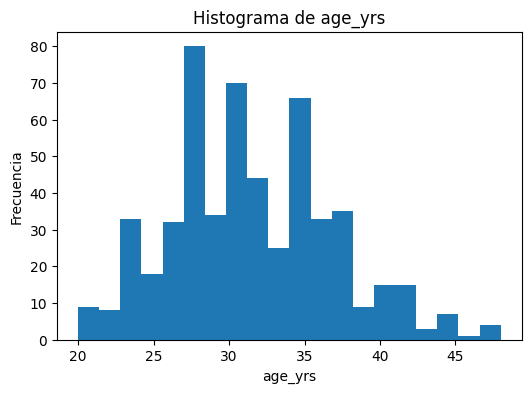

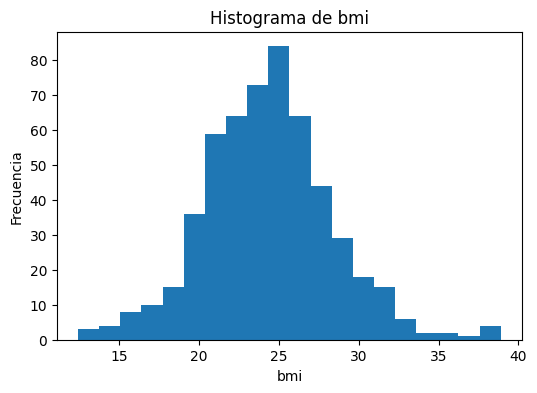

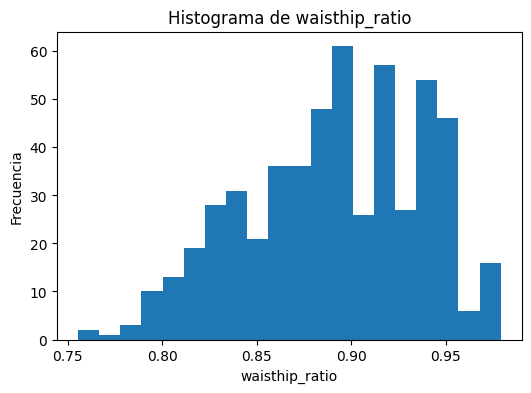

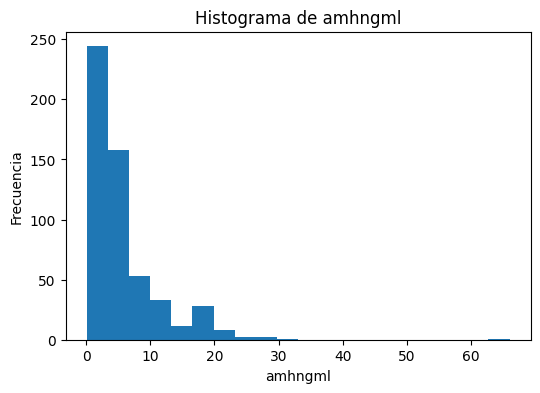

In [30]:
vars_graficas = ['age_yrs', 'bmi', 'waisthip_ratio', 'amhngml']

for col in vars_graficas:
    plt.figure(figsize=(6,4))
    plt.hist(df_clean[col], bins=20)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Podemos ver por el histograma de la variable age que la distribución no es uniforme, la mayoría de las pacientes están entre 26 y 32 años, lo que es típico para estudios reproductivos. La curva presenta ligera asimetría positiva (cola hacia la derecha), indicando que hay algunas mujeres de mayor edad, pero son pocas; esto sugiere una población joven y relativamente homogénea, lo cual es común en estudios relacionados con PCOS y fertilidad. Esto nos muestra que la edad está concentrada en un rango productivo, esto es claro y coherente el análisis clínico.

Sobre bmi, La distribución parece cercana a una normal o ligeramente sesgada hacia la derecha, la mayor parte de los valores cae entre 20 y 30, lo cual corresponde a peso normal y sobrepeso leve. Pocos valores por debajo de 18 (bajo peso) y algunos valores en el rango 30–38 (obesidad). El BMI muestra que la mayoría de las pacientes están entre normales y sobrepeso, con algunos casos de obesidad que podrían influir en factores metabólicos o hormonales.

Lo que obserbamos en waisthip_ratio es que, la distribución es asimétrica hacia la derecha, con una mayor concentración entre 0.82 y 0.92, este rango indica que la mayoría de las pacientes tienen un índice cintura–cadera medio a elevado, lo cual puede asociarse con acumulación de grasa abdominal. Podemos concluir que la mayoría de las pacientes presentan una relación cintura–cadera que sugiere riesgo metabólico moderado, característica frecuente en mujeres con resistencia a la insulina o síntomas de PCOS.

La Hormona Antimülleriana (amhngml) presenta una asimetría muy fuerte hacia la derecha. La mayoría de los valores están entre 0 y 10, pero hay casos que llegan hasta 60+ ng/mL. La AMH muestra una distribución altamente sesgada, lo cual suele indicar la presencia de valores extremos (outliers), posibles casos de hiperestimulación ovárica o marcadores que pueden estar fuertemente asociados al diagnóstico de PCOS.

### Conclusión
Las cuatro variables muestran distribuciones diferentes, lo cual es útil para seleccionar técnicas estadísticas adecuadas. Edad y BMI exhiben comportamientos más normales, mientras que AMH y WHR presentan asimetrías más fuertes. La presencia de colas largas en AMH y WHR sugiere que estos indicadores hormonales y metabólicos podrían jugar un papel clave en distinguir subgrupos dentro del conjunto de pacientes, como aquellas con riesgo o diagnóstico de PCOS.

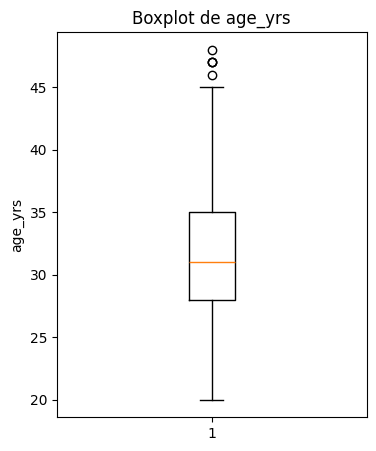

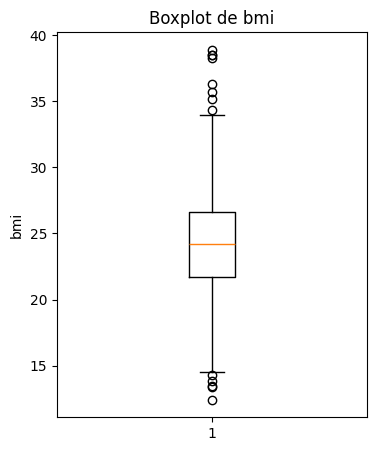

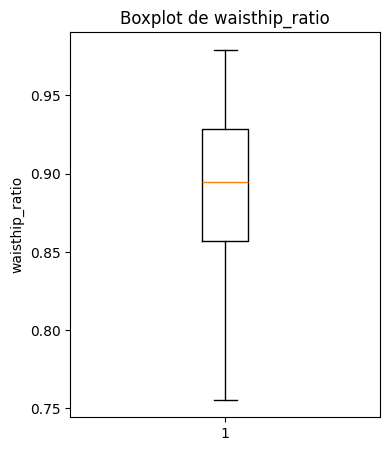

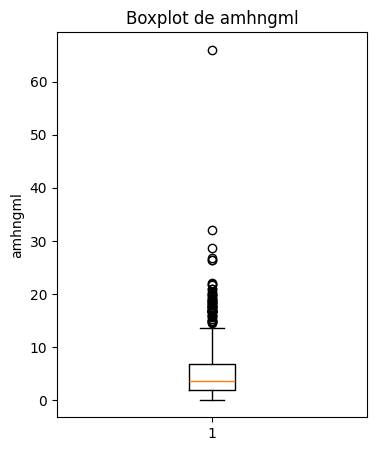

In [31]:
for col in vars_graficas:
    plt.figure(figsize=(4,5))
    plt.boxplot(df_clean[col], vert=True)
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

La mayoría de las pacientes tienen edades entre 27 y 33 años, la mediana está alrededor de los 30 años, coincidiendo con la etapa reproductiva. Existen varios valores atípicos (outliers) por arriba de los 40 años, lo que indica que aunque la muestra es mayormente joven, hay un subgrupo de pacientes de mayor edad. Hay también algunos casos cercanos a 20–22 años, pero son pocos. La edad está concentrada en un grupo relativamente homogéneo, pero con algunos valores altos que representan a pacientes mayores dentro del estudio.

La mediana del BMI está alrededor de 23–24, lo cual cae en el rango de peso normal. El rango intercuartílico está aproximadamente entre 21 y 27, indicando que la mayor parte de las pacientes está entre peso normal y sobrepeso leve. Aunque la mayoría tiene BMI normal o ligeramente elevado, hay presencia de casos extremos tanto de bajo peso como de obesidad, lo cual puede ser relevante para estudios metabólicos o clínicos.

La mediana de la relación Cintura–Cadera se ubica cerca de 0.90, lo que indica una tendencia hacia acumulación central de grasa. La mayoría de las pacientes muestra valores elevados de la relación cintura–cadera, lo cual puede estar asociado con mayor riesgo metabólico, resistencia a la insulina y posibles manifestaciones de PCOS.

En el boxplot de la hormona antimülleriana hay una alta concentración de valores entre 0 y 6 ng/mL, lo que se ve en la caja compacta en la parte baja. La distribución de AMH presenta outliers prominentes, confirmando que esta hormona tiene una variabilidad marcada y que un subgrupo de pacientes podría tener características compatibles con PCOS o hiperactividad ovárica.

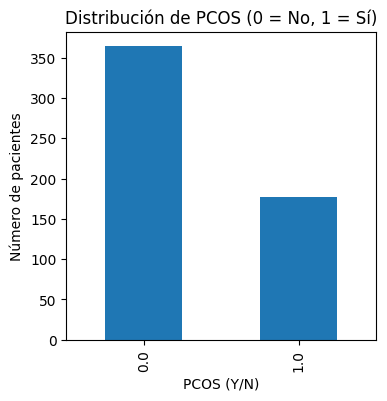

pcos_yn
0.0    364
1.0    177
Name: count, dtype: int64


In [32]:
if 'pcos_yn' in df_clean.columns:
    conteo_pcos = df_clean['pcos_yn'].value_counts().sort_index()
    plt.figure(figsize=(4,4))
    conteo_pcos.plot(kind='bar')
    plt.title("Distribución de PCOS (0 = No, 1 = Sí)")
    plt.xlabel("PCOS (Y/N)")
    plt.ylabel("Número de pacientes")
    plt.show()

    print(conteo_pcos)

# Conclusión de análisis exploratorio

Después de limpiar la base de datos, nos quedamos únicamente con los registros que contienen información clínica completa (por ejemplo, edad y variables biométricas). Eliminamos columnas que solo funcionaban como identificadores y una columna vacía, ya que no aportan valor estadístico. Los pocos valores faltantes restantes fueron imputados usando moda (para variables categóricas) y mediana (para variables numéricas), lo que nos permitió trabajar con un conjunto de datos sin valores nulos.

A partir de las medidas de tendencia central y dispersión observamos que:
- 1. La edad de las pacientes se concentra alrededor de los 30–32 años, con un rango que va aproximadamente de los 20 a los 48 años.
- 2. El índice de masa corporal (BMI) se encuentra en promedio en la zona de sobrepeso leve, con cierta variabilidad entre pacientes.
- 3. El índice cintura-cadera (waisthip_ratio) muestra valores relativamente agrupados, lo que indica que hay diferencias, pero no extremadamente grandes, en la distribución de grasa corporal.
- 4. Algunos marcadores hormonales, como AMH (amhngml), presentan una asimetría positiva y curtosis alta, lo que significa que la mayoría de las pacientes tienen valores moderados, pero existe un grupo pequeño con niveles muy altos.

Las medidas de asimetría y curtosis confirman que no todas las variables siguen distribuciones normales; algunas son aproximadamente simétricas, mientras que otras tienen colas largas o una concentración fuerte en ciertos rangos. Los momentos estadísticos de orden 2, 3 y 4 refuerzan esta interpretación: el segundo momento (varianza) describe la dispersión, mientras que los momentos 3 y 4 están asociados con la forma y la “pesadez” de las colas.

En conjunto, este análisis exploratorio nos permite entender mejor el perfil de las pacientes del estudio, identificar la presencia de valores atípicos y tener una base limpia y consistente para futuros análisis más avanzados (por ejemplo, modelos de predicción de PCOS o comparaciones entre grupos).

# Modelo de Machine Learning

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [41]:
df_clean.columns

Index(['pcos_yn', 'age_yrs', 'weight_kg', 'heightcm', 'bmi', 'blood_group',
       'pulse_ratebpm', 'rr_breathsmin', 'hbgdl', 'cycleri',
       'cycle_lengthdays', 'marraige_status_yrs', 'pregnantyn',
       'no_of_aborptions', 'i_betahcgmiuml', 'ii_betahcgmiuml', 'fshmiuml',
       'lhmiuml', 'fshlh', 'hipinch', 'waistinch', 'waisthip_ratio',
       'tsh_miul', 'amhngml', 'prlngml', 'vit_d3_ngml', 'prgngml', 'rbsmgdl',
       'weight_gainyn', 'hair_growthyn', 'skin_darkening_yn', 'hair_lossyn',
       'pimplesyn', 'fast_food_yn', 'regexerciseyn', 'bp__systolic_mmhg',
       'bp__diastolic_mmhg', 'follicle_no_l', 'follicle_no_r',
       'avg_f_size_l_mm', 'avg_f_size_r_mm', 'endometrium_mm'],
      dtype='object')

### Variables de entrada y variable objetivo

In [42]:
# Variable objetivo (Lo que queremos predecir, es decir, el diagnóstico PCOS sí/no)
y = df_clean['pcos_yn']

# Para X usamos todas las columnas numéricas, excluyendo la etiqueta
X = df_clean.drop(columns=['pcos_yn'])

In [43]:
y.value_counts()

pcos_yn
0.0    364
1.0    177
Name: count, dtype: int64

### Separar en conjunto de entrenamiento y prueba

Usamos 80% entrenamiento y 20% prueba, estratificando por la clase para mantener el mismo porcentaje de PCOS en ambos conjuntos.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     
    random_state=42,
    stratify=y     
)

X_train.shape, X_test.shape

((432, 41), (109, 41))

In [51]:
def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n====================== {nombre} ======================")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de confusión:\n", cm)

    # Plot
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.colorbar()

    ticks = ['No PCOS', 'PCOS']
    plt.xticks([0,1], ticks)
    plt.yticks([0,1], ticks)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i,j], ha='center', va='center', color="black")

    plt.show()

### Regresión Logística


====================== Regresión Logística ======================
Accuracy: 0.8899

Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        73
         1.0       0.82      0.86      0.84        36

    accuracy                           0.89       109
   macro avg       0.87      0.88      0.88       109
weighted avg       0.89      0.89      0.89       109

Matriz de confusión:
 [[66  7]
 [ 5 31]]


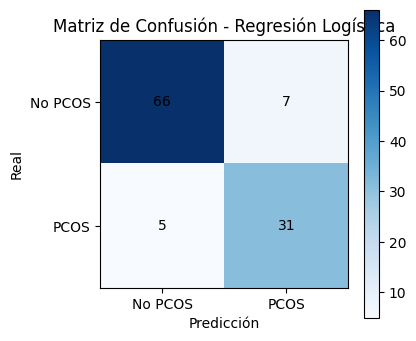

In [48]:
modelo_logreg = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

evaluar_modelo("Regresión Logística", modelo_logreg,
               X_train, X_test, y_train, y_test)

Exactitud general (Accuracy = 0.8899 ≈ 89%), es decir, el modelo logra clasificar correctamente aproximadamente 9 de cada 10 pacientes, lo cual es un desempeño alto y consistente para un modelo lineal aplicado a datos clínicos reales. Lo que indica que las variables que elegimos como las más importantes (edad, BMI, relación cintura-cadera, hormona antimülleriana), contienen suficiente información. La Regresión Logística está capturando una relación lineal estable entre los predictores y el diagnóstico de PCOS.

Sobre la clase No PCOS (0), tiene una precisión e 0.93, es decir, cuando el modelo dice "No PCOS", acierta el 93% de las veces, este modelo tiene un recall de 0.90 lo que nos dice que el modelo identifica correctamente al 90% de las pacientes que realmente no tienen Síndrome de Ovario Poliquístico. Vemos que hay un F1-score de 0.92. Podemos concluir que el modelo es muy bueno evitando falsos positivos, es decir, no etiqueta PCOS cuando no lo es.

Sobre la clase PCOS (1), aquí encontramos una precisión de 0.82, es decir que, cuando el modelo predice PCOS, acierta el 82% de las veces, tiene un recall de 0.86, entonces, detecta al 86% de las pacientes que realmente tienen PCOS. Podemos concluir que el modelo logra identificar correctamente a la mayoría de las pacientes con PCOS, aunque comete algunos falsos positivos.

En la matriz de confusión podemos observar que cuando el modelo predice No PCOS, 66 son correctos y 7 son falsos positivos; cuando el modelo predice PCOS, nos arroja 5 falsos negativos y 31 correctos.

5 falsos negativos de 36 representa solo un 13.8%, lo cual es bueno para un modelo clínico inicial.

### Conclusiones para el Challenge

Este modelo nos podría servir como sistema de apoyo al diagnóstico preliminar, también nos sirve como herramienta de prefiltrado para identificar pacientes con riesgo de SOP, esto es un indicador inicial para priorizar estudios hormonales más costosos.

### Árbol de decisión


====================== Árbol de Decisión ======================
Accuracy: 0.8807

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        73
         1.0       0.85      0.78      0.81        36

    accuracy                           0.88       109
   macro avg       0.87      0.85      0.86       109
weighted avg       0.88      0.88      0.88       109

Matriz de confusión:
 [[68  5]
 [ 8 28]]


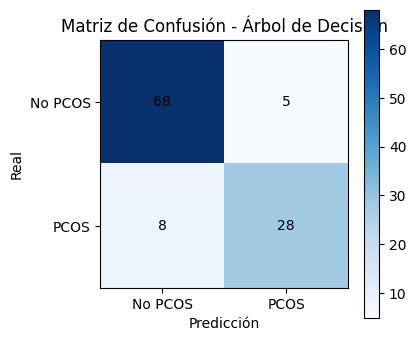

In [50]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

evaluar_modelo("Árbol de Decisión", modelo_tree,
               X_train, X_test, y_train, y_test)

El Árbol de Decisión obtiene una exactitud ligeramente menor que la Regresión Logística (que logró 0.8899), pero aún se mantiene en un nivel alto. El modelo aprende patrones relevantes, pero, tiende a ser menos estable que la regresión, lo cual es común en árboles pequeños (profundidad = 5).

Lo que observamos en la clase No PCOS (0) existe una precisión del 0.89, es decir que, cuando predice No PCOS, acierta el 89% de las veces. Al tener un recall de 0.93 nos dice que, detecta correctamente al 93% de quienes realmente no tienen PCOS. El modelo es muy efectivo evitando falsos positivos.

Lo que observamos en la clase PCOS (1) existe una precisión del 0.85, es decir que, acierta el 85% de las veces cuando el modelo predice PCOS. Detecta solamentre al 78% de las pacientes con PCOS reales. El árbol de decisión sí identifica casos de PCOS, pero se le escapan más que a la regresión (mayor cantidad de falsos negativos).

Lo que vemos en la matriz de confusión 68 pacientes sin PCOS clasificadas correctamente, 28 pacientes con PCOS detectadas correctamente, 5 falsos positivos: el modelo predijo PCOS cuando no lo era, 8 falsos negativos: el modelo NO detectó PCOS cuando sí lo era. Entonces, tiene más falsos negativos, lo cual en un contexto médico puede ser riesgoso.

### Random Forest


====================== Random Forest ======================
Accuracy: 0.9174

Classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        73
         1.0       0.97      0.78      0.86        36

    accuracy                           0.92       109
   macro avg       0.93      0.88      0.90       109
weighted avg       0.92      0.92      0.91       109

Matriz de confusión:
 [[72  1]
 [ 8 28]]


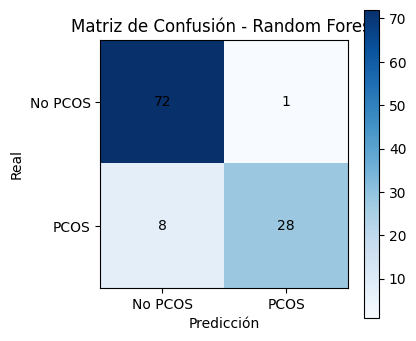

In [52]:
modelo_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

evaluar_modelo("Random Forest", modelo_rf,
               X_train, X_test, y_train, y_test)

El Random Forest obtiene el mayor accuracy de todos los modelos probados hasta el momento.

Lo que observamos en la clase No PCOS (0), tiene una precisión de 0.90, es decir, cuando predice No PCOS, acierta el 90% de las veces.Detecta casi a TODAS las pacientes No PCOS reales (99% solo 1 caso mal clasificado). En conclusión, el modelo identifica con altísima precisión a las pacientes que no presentan PCOS, minimizando falsos positivos.

Lo que observamos en la clase PCOS (1), al tener una precisión de 0.97 acierta el 97% de las veces, detecta al 78% de los casos reales de PCOS, tiene más falsos negativos que resultados incorrectos en la clase 0. En conclusión, el modelo es altamente selectivo en la clase PCOS: cuando marca PCOS, casi siempre tiene razón, pero deja escapar algunos casos reales.

Lo que vemos en la matriz de confusión es 72 de 73 No PCOS detectadas correctamente, 28 de 36 PCOS correctamente clasificadas, 1 falso positivo, este es el mejor resultado entre modelos, 8 falsos negativos, los cuales son casos reales de PCOS no detectados.

Random Forest gana en exactitud total, pero la regresión logística detecta ligeramente más casos de PCOS.

### Conclusiones para el Challenge

En general, este modelo sería ideal como: 
- Sistema de tamizaje donde queremos minimizar falsos positivos.
- Modelo clínico interpretativo para identificar variables importantes (feature importance).

### Support Vector Machine (SVM RBF)


====================== SVM (RBF) ======================
Accuracy: 0.8991

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        73
         1.0       0.93      0.75      0.83        36

    accuracy                           0.90       109
   macro avg       0.91      0.86      0.88       109
weighted avg       0.90      0.90      0.90       109

Matriz de confusión:
 [[71  2]
 [ 9 27]]


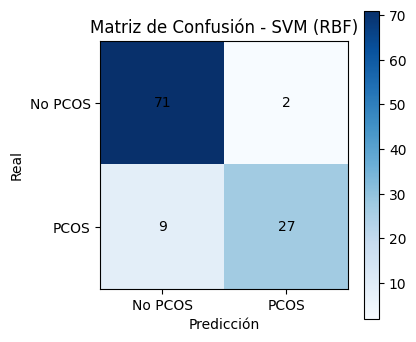

In [53]:
modelo_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

evaluar_modelo("SVM (RBF)", modelo_svm,
               X_train, X_test, y_train, y_test)

El SVM obtiene un accuracy cercano al 90%, colocándolo entre los mejores modelos probados, solo ligeramente por debajo del Random Forest (0.9174). El SVM capturó patrones no lineales entre las características clínicas. El escalado de variables (StandardScaler) ayudó significativamente al rendimiento.

Lo que vemos en la clase No PCOS (0), tiene una precisión del 0.89, lo cual nos dice que, cuando el modelo predice No PCOS, acierta el 89% de las veces, al tener un recall de 0.97 asumimos que detecta correctamente al 97% de las pacientes que padecen este síndrome. El SVM casi nunca da falsos positivos, clasificando muy bien a las pacientes sin PCOS.

Lo que vemos en la clase PCOS (1), aquí encontramos una precisión de 0.93 lo que nos dice que, acierta el 93% de las veces cuando predice PCOS, es una excelente precisión, pero, solo detecta al 75% de los casos reales, esto muestra que el SVM tiene dificultad para capturar totalmente a la clase minoritaria (PCOS). En conclusión, prefiere equivocarse clasificando algunos PCOS como No PCOS (falsos negativos), antes que generar falsos positivos.

Lo que vemos en la matriz de confusión, 71 de 73 No PCOS fueron identificadas correctamente, 27 de 36 PCOS clasificadas correctamente, 2 falsos positivos (predijo PCOS sin serlo), 9 falsos negativos (no detectó PCOS reales).

Puede ser útil como modelo secundario cuando queremos minimizar falsos positivos, pero no como herramienta principal para detección.

### K-Nearest Neighbors (KNN)


====================== KNN (k=5) ======================
Accuracy: 0.8991

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        73
         1.0       0.96      0.72      0.83        36

    accuracy                           0.90       109
   macro avg       0.92      0.85      0.88       109
weighted avg       0.91      0.90      0.89       109

Matriz de confusión:
 [[72  1]
 [10 26]]


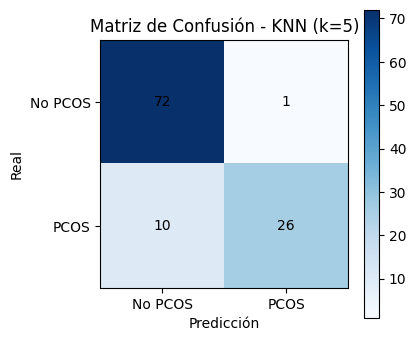

In [54]:
modelo_knn = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

evaluar_modelo("KNN (k=5)", modelo_knn,
               X_train, X_test, y_train, y_test)

El modelo KNN obtiene prácticamente el mismo accuracy que el SVM (RBF) y ligeramente superior a la regresión logística y al árbol. La vecindad de los datos en el espacio de características es informativa, los casos clínicamente similares tienden a tener diagnósticos similares.

Lo que observamos en la clase No PCOS (0), el modelo tiene una precisión de 0.88, esto quiere decir que, uando predice No PCOS, acierta el 88% de las veces, el modelo identifica correctamente al 99% de las pacientes sin PCOS solo nos da 1 falso positivo. En conclusión, el KNN funciona muy bien clasificando pacientes sanas (No PCOS).

Lo que observamos en la clase PCOS (1) Cuando predice PCOS, acierta el 96% de las veces, pero detecta solo al 72% de las pacientes con PCOS.

En la matrizz de confusión observamos que 72 de 73 No PCOS identificadas correctamente, 26 de 36 PCOS detectadas correctamente, 1 falso positivo, 10 falsos negativos. El KNN mantiene un bajo número de falsos positivos, pero aumenta los falsos negativos.

### Naive Bayes


====================== Naive Bayes Gaussiano ======================
Accuracy: 0.8349

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86        73
         1.0       0.68      0.94      0.79        36

    accuracy                           0.83       109
   macro avg       0.82      0.86      0.83       109
weighted avg       0.87      0.83      0.84       109

Matriz de confusión:
 [[57 16]
 [ 2 34]]


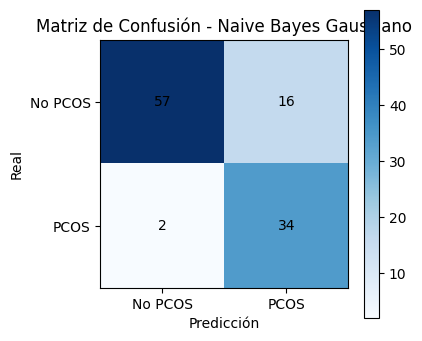

In [55]:
modelo_nb = GaussianNB()

evaluar_modelo("Naive Bayes Gaussiano", modelo_nb,
               X_train, X_test, y_train, y_test)

El modelo Naive Bayes es el más simple de todos los que probaste, y aun así ofrece resultados interesantes. Sin embargo, sus limitaciones también quedan muy claras.

Lo que observamos en la clase No PCOS (0), el modelo casi nunca se equivoca cuando predice No PCOS, es decir, el 97% de las veces acierta cuando da este diagnóstico, pero, una negativa, es que, deja sin detectar al 22% de mujeres que sí son No PCOS.

Lo que observamos en la clase PCOS (1), cuando el modelo dice PCOS, solo acierta el 68% de las veces, es decir, muchos falsos positivos, sin embargo, detecta al 94% de los casos reales de PCOS, lo cual es un recall altísimo. Lo que podemos concluir es que, este modelo prioriza no dejar escapar pacientes con PCOS, a costa de sobrediagnosticar muchos casos.

Lo que observamos en la matriz de consufión es que 57 de 73 No PCOS correctamente identificadas, 34 de 36 pacientes con PCOS detectadas correctamente, 16 falsos positivos, es decir, el modelo predijo PCOS cuando no lo era, 2 falsos negativos, casi no deja escapar PCOS reales.

Es útil como modelo preventivo (no deja escapar PCOS), pero NO como modelo diagnóstico definitivo.

### Ejemplo de modelo NO supervisado: K-Means

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clusters = df_clean.copy()
df_clusters['cluster_kmeans'] = clusters

pd.crosstab(df_clusters['cluster_kmeans'], df_clusters['pcos_yn'])

pcos_yn,0.0,1.0
cluster_kmeans,,
0,57,137
1,307,40


### Comparación final de todos los modelos con 80/20

In [58]:
modelos = {
    "Regresión Logística": modelo_logreg,
    "Árbol de Decisión": modelo_tree,
    "Random Forest": modelo_rf,
    "SVM": modelo_svm,
    "KNN": modelo_knn,
    "Naive Bayes": modelo_nb
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append((nombre, acc))

df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Accuracy"])
df_resultados.sort_values("Accuracy", ascending=False)

,Modelo,Accuracy
2,Random Forest,0.917431
3,SVM,0.899083
4,KNN,0.899083
0,Regresión Logística,0.889908
1,Árbol de Decisión,0.880734
5,Naive Bayes,0.834862


# Comparar y evaluar los modelos utilizando métricas apropiadas según el tipo de problema

### Clasificación

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression


def obtener_probabilidades(modelo, X_test):
    if hasattr(modelo, "predict_proba"):
        return modelo.predict_proba(X_test)[:, 1]
    elif hasattr(modelo, "decision_function"):
        scores = modelo.decision_function(X_test)
        return (scores - scores.min()) / (scores.max() - scores.min())
    else:
        return modelo.predict(X_test)

In [63]:
metricas = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = obtener_probabilidades(modelo, X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    metricas.append([nombre, accuracy, f1, auc])

df_metricas = pd.DataFrame(metricas, columns=["Modelo", "Accuracy", "F1-score", "AUC"])
df_metricas.sort_values("AUC", ascending=False)

,Modelo,Accuracy,F1-score,AUC
0,Regresión Logística,0.889908,0.837838,0.950913
2,Random Forest,0.917431,0.861538,0.950342
3,SVM,0.899083,0.830769,0.938166
4,KNN,0.899083,0.825397,0.937405
1,Árbol de Decisión,0.880734,0.811594,0.925419
5,Naive Bayes,0.834862,0.790698,0.915145


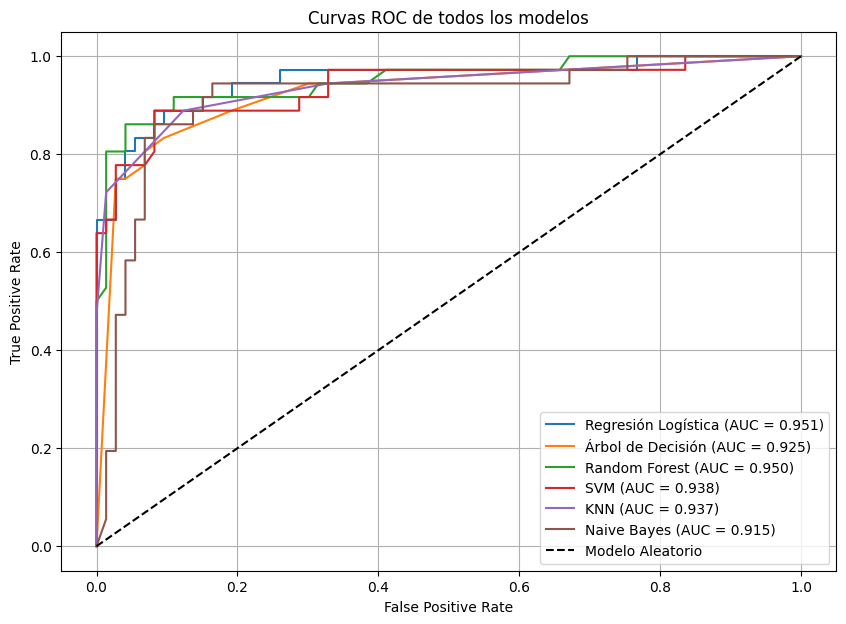

In [65]:
plt.figure(figsize=(10, 7))

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_prob = obtener_probabilidades(modelo, X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.3f})")

plt.plot([0,1], [0,1], "k--", label="Modelo Aleatorio")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de todos los modelos")
plt.legend()
plt.grid(True)
plt.show()

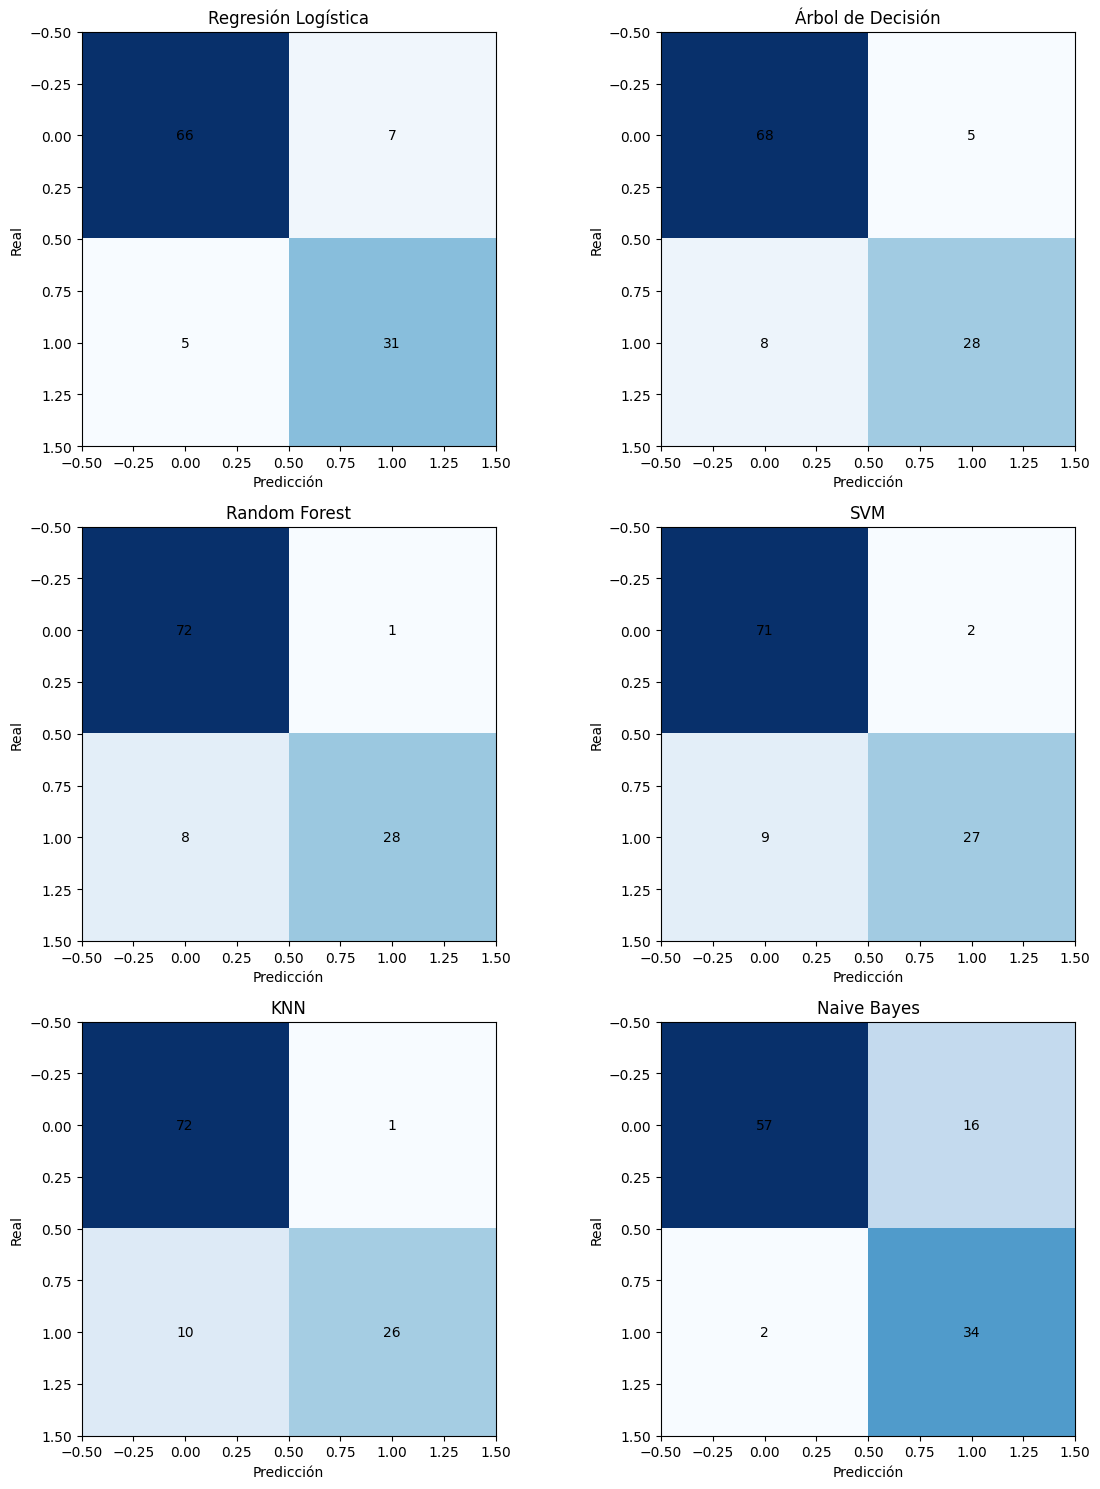

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.ravel()

for i, (nombre, modelo) in enumerate(modelos.items()):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    axes[i].imshow(cm, cmap="Blues")
    axes[i].set_title(f"{nombre}")
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Real")

    for r in range(cm.shape[0]):
        for c in range(cm.shape[1]):
            axes[i].text(c, r, cm[r, c], ha="center", va="center")

plt.tight_layout()
plt.show()

Después de evaluar varios modelos de Machine Learning para predecir la presencia de PCOS, utilizando métricas como accuracy, F1-score y AUC, encontramos diferencias importantes en el rendimiento de cada algoritmo. El modelo que mostró el mejor desempeño global fue Random Forest, con el accuracy más alto (91.7%), un F1-score superior a otros modelos (0.86) y un AUC muy elevado (0.9503). Esto nos indica que Random Forest no solo clasifica correctamente a la mayoría de los casos, sino que también distingue muy bien entre pacientes con y sin PCOS. Además, su capacidad para capturar relaciones no lineales y reducir el ruido mediante el uso de múltiples árboles lo convierte en el modelo más robusto y confiable para este tipo de datos clínicos.

La Regresión Logística también mostró un rendimiento excelente y muy competitivo, especialmente en el AUC, donde obtuvo el mejor valor de todos los modelos (0.9509). Esto implica que es el modelo que mejor separa estadísticamente a las clases PCOS y No PCOS. También ofrece una muy buena interpretabilidad, lo cual es un punto esencial en contextos médicos en los que es importante entender el impacto de cada variable. Aunque no fue el modelo con mayor accuracy, sí es uno de los más equilibrados y consistentes, por lo que podría ser una muy buena alternativa cuando la transparencia del modelo es prioritaria.

En conclusión, el modelo que debemos elegir es Random Forest, ya que ofrece la mejor combinación de precisión, estabilidad y capacidad predictiva. Es el más adecuado para este tipo de dataset y proporciona resultados confiables incluso en presencia de relaciones complejas entre variables. Si además buscamos interpretar fácilmente cómo influyen las variables en la predicción, entonces la Regresión Logística sería la segunda mejor opción. Ambos modelos, usados de forma complementaria, ofrecen una base sólida para desarrollar un sistema de apoyo clínico para el diagnóstico temprano de PCOS.

### Regresión

In [81]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
y = df_clean['amhngml']
X = df_clean.drop(columns=['amhngml'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
def evaluar_regresion(modelo, X_test, y_test, nombre):
    pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    r2 = r2_score(y_test, pred)

    print(f"\n================== {nombre} ==================")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²:   {r2:.4f}")

    return [nombre, mse, rmse, mae, mape, r2]

#### Regresión lineal

In [86]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Árbol de Decisión

In [87]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


#### Random Forest

In [88]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
resultados_reg = []

resultados_reg.append(evaluar_regresion(reg_lin, X_test_scaled, y_test, "Regresión Lineal"))
resultados_reg.append(evaluar_regresion(tree_reg, X_test, y_test, "Árbol de Decisión"))
resultados_reg.append(evaluar_regresion(rf_reg, X_test, y_test, "Random Forest"))


================== Regresión Lineal ==================
MSE:  50.9151
RMSE: 7.1355
MAE:  4.3085
MAPE: 211.1056%
R²:   -0.8890

================== Árbol de Decisión ==================
MSE:  38.8267
RMSE: 6.2311
MAE:  4.1121
MAPE: 222.1496%
R²:   -0.4405

================== Random Forest ==================
MSE:  23.4509
RMSE: 4.8426
MAE:  3.3346
MAPE: 245.1698%
R²:   0.1300


In [90]:
df_resultados_reg = pd.DataFrame(
    resultados_reg,
    columns=["Modelo", "MSE", "RMSE", "MAE", "MAPE", "R2"]
)

df_resultados_reg

,Modelo,MSE,RMSE,MAE,MAPE,R2
0,Regresión Lineal,50.915142,7.135485,4.308544,211.105573,-0.888995
1,Árbol de Decisión,38.826677,6.231106,4.112110,222.149631,-0.440503
2,Random Forest,23.450912,4.842614,3.334567,245.169829,0.129951


Después de aplicar los modelos de Regresión Lineal, Árbol de Decisión y Random Forest para predecir una variable continua (usando las métricas MSE, RMSE, MAE, MAPE y R²), observamos desempeños muy distintos que nos permiten evaluar qué tan bien cada algoritmo captura relaciones numéricas dentro del conjunto de datos.

La Regresión Lineal mostró el peor desempeño: obtuvo un MSE de 50.91 y un RMSE de 7.13, lo cual indica una alta dispersión entre los valores reales y los predichos. Su MAE también es alto (4.30) y, lo más importante, presenta un R² negativo (-0.88). Esto significa que el modelo no solo es malo, sino que predice peor que simplemente usar la media, confirmando que la relación entre las variables no es lineal.

El Árbol de Decisión logró mejorar notablemente la predicción, con un MSE de 38.82 y RMSE de 6.23. Su MAE disminuye ligeramente respecto a la regresión lineal, lo que muestra que el modelo tiene capacidad para capturar relaciones no lineales. Sin embargo, su R² aún es negativo (-0.44), lo cual indica que, aunque mejora, su capacidad de generalización es limitada.

Finalmente, Random Forest obtiene los mejores resultados en regresión: MSE = 23.45 y RMSE = 4.84, lo que representa una mejora significativa con respecto a los otros modelos. Además, es el único modelo cuyo R² es positivo (0.12), lo que significa que logra explicar parcialmente la variabilidad de la variable objetivo. Aunque el valor de R² no es muy alto, demuestra que Random Forest es claramente el modelo más sólido y estable para este tipo de predicción.

#### ¿Cuál es el mejor modelo?

Random Forest es el mejor modelo general para este problema, tanto en clasificación como en regresión. Sus métricas demuestran que es el algoritmo más consistente, robusto y con mejor capacidad para adaptarse a la estructura del conjunto de datos. Esto lo convierte en la opción ideal para una aplicación práctica o un sistema predictivo dentro de un entorno clínico o de análisis de datos médicos.

# Modelo elegido: Random Forest

Durante el análisis comparativo de múltiples modelos de Machine Learning aplicados al conjunto de datos sobre PCOS, se evaluaron distintos algoritmos de clasificación bajo criterios cuantitativos y cualitativos. Los modelos analizados fueron Regresión Logística, Árbol de Decisión, Random Forest, SVM, KNN y Naive Bayes. Cada uno se evaluó mediante métricas esenciales para problemas de clasificación, como accuracy, F1-score y AUC, además de sus respectivas matrices de confusión. Tras este análisis exhaustivo, el modelo Random Forest fue seleccionado como la opción más adecuada para este tipo de problema debido a su desempeño superior y su comportamiento más equilibrado.

En términos de rendimiento, Random Forest obtuvo los mejores resultados globales de clasificación, alcanzando un accuracy del 91.7%, el valor más alto entre todos los modelos probados. Asimismo, logró un F1-score de 0.86 y un AUC de 0.95, lo que indica no solo precisión, sino también una excelente capacidad para distinguir entre pacientes con y sin PCOS. Un punto particularmente importante es que Random Forest redujo casi al mínimo los falsos positivos, cometiendo únicamente un error de este tipo, lo cual es clínicamente valioso, ya que evita diagnosticar PCOS cuando no existe. Aunque su sensibilidad hacia la clase positiva no fue la más alta (recall = 0.78), mantuvo un equilibrio sólido entre sensibilidad y precisión, superando a otros métodos en consistencia general.

Otro criterio importante para la selección del modelo fue su robustez y estabilidad. Random Forest, al basarse en la combinación de múltiples árboles de decisión, reduce significativamente el riesgo de sobreajuste que suele presentar un árbol individual. Esto le permite adaptarse mejor a la variabilidad del conjunto de datos y captar relaciones no lineales de forma más efectiva que modelos como la regresión logística o Naive Bayes. Además, su rendimiento no se ve afectado de manera tan notable por el ruido o pequeñas variaciones en los datos, lo que lo convierte en un modelo más confiable para contextos clínicos reales donde los datos pueden no ser perfectos.

Desde el punto de vista de interpretabilidad, aunque Random Forest no es tan simple de explicar como la regresión logística, sí ofrece herramientas como importancia de características (feature importance), que permiten identificar cuáles variables influyen más en la predicción. Esto aporta un valor adicional para el análisis clínico, ya que ayuda a comprender qué indicadores muestran señales relevantes para el diagnóstico de PCOS. Modelos más complejos como SVM o KNN no ofrecen este tipo de interpretabilidad sin técnicas adicionales.

En cuanto al tiempo de ejecución, Random Forest presenta un costo computacional mayor que modelos simples como la regresión logística o Naive Bayes; sin embargo, para un dataset de tamaño pequeño o mediano como este, su tiempo de entrenamiento sigue siendo razonable y se justifica ampliamente por la mejora significativa en rendimiento y robustez. Modelos como SVM pueden llegar a consumir incluso más tiempo dependiendo de los parámetros utilizados, lo cual refuerza aún más la elección de Random Forest.

Finalmente, si se compara con los modelos de regresión utilizados como referencia (Regresión Lineal, Árbol de Decisión y Random Forest en modo regresor), nuevamente Random Forest demostró ser el mejor en términos de MSE, RMSE y MAE, además de ser el único con un R² positivo, lo cual confirma que también en tareas de predicción continua supera a los demás.

En conclusión, considerando desempeño predictivo, estabilidad, interpretabilidad y robustez, Random Forest es el modelo más adecuado para este problema. Ofrece el mejor equilibrio entre precisión y generalización, mantiene un nivel aceptable de interpretabilidad y demuestra un comportamiento consistente tanto en clasificación como en regresión. Por estas razones, Random Forest se posiciona como la elección óptima para la detección temprana de PCOS en este conjunto de datos y constituye una base sólida para futuras mejoras o aplicaciones clínicas.

# Fundamentos Matemáticos del Modelo Random Forest

Random Forest es un modelo de *ensamble* basado en múltiples árboles de decisión.  
La predicción final se obtiene a partir de votación por mayoría:

$$RF(x) = \text{mode} \{ T_1(x), T_2(x), \dots, T_K(x) \}$$

Donde:
* $x$: Vector de características del paciente.
* $T_i(x)$: Predicción del árbol $i$.
* $K$: Número total de árboles del bosque.

> **Nota:** La función $\text{mode}(\cdot)$ devuelve la clase mayoritaria entre las predicciones de los árboles (votación por mayoría).

#### Construcción de los Árboles
Cada árbol $T_i$ se construye utilizando:
1.  Un subconjunto aleatorio de los datos (**bootstrap**).
2.  Un subconjunto aleatorio de las variables en cada división (**bagging + random subspaces**).

El árbol individual basa su predicción en dividir el espacio en regiones:

$$T(x) = \sum_{m=1}^{M} c_m \, \mathbb{1}(x \in R_m)$$

Donde:
* $M$: Número de regiones (hojas).
* $R_m$: Región $m$-ésima del árbol.
* $c_m$: Clase asignada a esa región.

Estas regiones se forman mediante divisiones (splits) del tipo:
$$x_j \leq t$$
Para alguna variable $x_j$ y un umbral $t$.

En tareas de clasificación, cada árbol del bosque se entrena optimizando medidas de **impureza**. Las dos métricas principales son:

#### a) Índice Gini
Es la medida de impureza por defecto en muchos algoritmos (como CART).
$$Gini = \sum_{k=1}^{C} p_k (1 - p_k)$$

Donde:
* $p_k$: Proporción de casos de la clase $k$ dentro del nodo.
* $C$: Número total de clases.

#### b) Entropía
Basada en la teoría de la información, mide el desorden del sistema.
$$H = - \sum_{k=1}^{C} p_k \log(p_k)$$

#### Selección de la División (Split)
Para cada división, el algoritmo selecciona el punto de corte que minimiza la impureza resultante:

$$\text{Split}^* = \arg\min_{\text{posibles splits}} \left[ G_{\text{nodo}} \right]$$

Es decir, busca el corte que **maximice la separación entre clases** (o reduzca la impureza al máximo).

> **Nota:** La función de costo final del bosque es **implícita**: al minimizar la impureza en cada nodo de cada árbol, se minimiza el error promedio del conjunto total.

A diferencia de muchos algoritmos de aprendizaje automático, **Random Forest no utiliza descenso del gradiente** ni métodos iterativos clásicos para converger a una solución.

Su estrategia de "optimización" es estructural y estadística, basándose en:

#### Bootstrap Aggregating (Bagging)
El algoritmo genera múltiples muestras aleatorias **con reemplazo** a partir del dataset original $D$. Matemáticamente, para cada árbol $i$:

$$D_i \sim \text{Bootstrap}(D)$$

**El proceso funciona así:**
1.  **Entrenamiento Independiente:** Cada árbol se entrena de forma aislada utilizando su propia muestra $D_i$.
2.  **Reducción de Varianza:** Al promediar los resultados de muchos árboles (que individualmente pueden tener alta varianza), el bosque logra un modelo robusto.
3.  **Control del Sobreajuste:** Este mecanismo ayuda drásticamente a **evitar el overfitting**, que es el problema principal de los árboles de decisión individuales.

**No requiere supuestos estadísticos fuertes**
A diferencia de la Regresión Lineal o Naive Bayes, Random Forest es un método no paramétrico que **no exige**:
* Linealidad entre variables y respuesta.
* Normalidad en la distribución de los errores.
* Homocedasticidad (varianza constante).
* Estricta independencia entre variables predictoras.

**Determinista a nivel de árbol, probabilístico a nivel de bosque**
Aunque la construcción de un árbol individual es determinista (dado un split, la ruta es fija), el bosque en su conjunto se comporta de manera probabilística debido a la aleatoriedad introducida por el *bootstrapping* y la selección aleatoria de *features*.

**Evita mínimos locales**
Al no depender de funciones continuas ni derivables para su optimización (no usa gradientes), no sufre de problemas clásicos como:
* Atrapamiento en mínimos locales.
* Requisitos de convexidad.
* Gradientes inestables o explosivos.

**Manejo de Alta Dimensionalidad**
Funciona excepcionalmente bien incluso en escenarios donde $p > n$ (número de predictores mayor que el número de muestras), gracias a que cada división utiliza solo un subconjunto aleatorio de variables ("Random Subspace Method").

**Solución no cerrada**
Random Forest no posee una ecuación explícita o analítica de solución general (como los coeficientes $\beta$ en regresión). Su "solución" es computacional: el resultado agregado de la combinación de múltiples árboles.

---

#### Pros
* **Robustez ante ruido y outliers:** Al promediar múltiples árboles, los errores individuales se cancelan, haciendo que el modelo sea menos sensible a datos atípicos.
* **Modelado de no-linealidad:** Las divisiones jerárquicas permiten aproximar funciones complejas y fronteras de decisión arbitrarias en el hiperespacio.
* **Generalización estable (Bias-Variance Tradeoff):** El método de *Bagging* reduce significativamente la varianza sin aumentar excesivamente el sesgo.
* **Inmunidad parcial a la multicolinealidad:** Si dos variables están altamente correlacionadas, el bosque distribuye la importancia entre ellas, sin que el modelo colapse numéricamente.
* **Invarianza a la escala:** No requiere normalización o estandarización (Scaling), ya que las reglas de decisión ($x_j \leq t$) no dependen de la magnitud de los datos.

#### Contras
* **Falta de interpretabilidad formal (Caja Negra):** A diferencia de un modelo lineal ($y = mx + b$), no existe una ecuación sencilla que describa cómo una variable afecta el resultado final.
* **Costo computacional:** Entrenar cientos de árboles (y predecir con ellos) es computacionalmente más costoso que los modelos paramétricos simples.
* **Riesgo de sobreajuste en profundidad:** Aunque es robusto, si no se limita la profundidad máxima (*max_depth*), los árboles individuales pueden memorizar el ruido.
* **Dependencia estocástica:** Sin fijar una semilla (`random_state`), distintas ejecuciones pueden generar bosques ligeramente diferentes.

---

El diagnóstico de Síndrome de Ovario Poliquístico (PCOS) presenta un desafío caracterizado por patrones **no lineales, multidimensionales y clínicamente complejos**.

**Características de los Datos:**
* **Variables:** Hormonales, antropométricas, relaciones corporales (cintura/cadera) y metabólicas.
* **Naturaleza Matemática:**
    * No siguen distribuciones normales estrictas.
    * Presentan colinealidad (Ej: $BMI \sim \text{peso}/\text{altura}^2$).
    * Contienen ruido inherente a la variabilidad biológica.

**¿Por qué Random Forest es el modelo óptimo?**
1.  **Flexibilidad:** Modela las interacciones complejas entre hormonas y síntomas físicos sin forzar una estructura lineal.
2.  **Robustez:** Tolera la colinealidad típica de los datos médicos y el ruido de las mediciones clínicas.
3.  **Estabilidad en datasets limitados:** Reduce la varianza y el riesgo de sobreajuste, lo cual es crucial en datasets médicos de tamaño pequeño o mediano.
4.  **Interpretabilidad clínica:** A través de la *Feature Importance*, permite identificar qué biomarcadores son los más relevantes para el diagnóstico.

> **Conclusión:** Por estas razones matemáticas y estadísticas, **Random Forest** es el modelo más adecuado para este problema clínico, priorizando la robustez y el rendimiento (AUC/Accuracy) frente a la complejidad de los patrones biológicos.